<a href="https://colab.research.google.com/github/samsontran/Traffic-Light-Detection-System/blob/main/yolov5_trafficlight_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov5_trafficlightdetect # set my directory folder to clone repo and install dependencies
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

In [ ]:
import yaml
import torch
from IPython.display import Image
import glob
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [ ]:
#train the model. The code below takes data from 'lights_trafficlight.yaml' and 'yolov5x_multiclass.yaml'
#we found that using batch size of 4 and 50 epochs works well
!python train.py --img 640 --batch 4 --epochs 50 \
  --data ./data/trafficlights.yaml --cfg ./models/yolov5x_trafficlight.yaml --weights yolov5x_trafficlight.pt \
  --name yolov5x_trafficlight --cache

/content/drive/MyDrive/yolov5_trafficlightdetect/yolov5
train: weights=yolov5x_trafficlight.pt, cfg=./models/yolov5x_trafficlight.yaml, data=./data/trafficlights.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_trafficlight, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

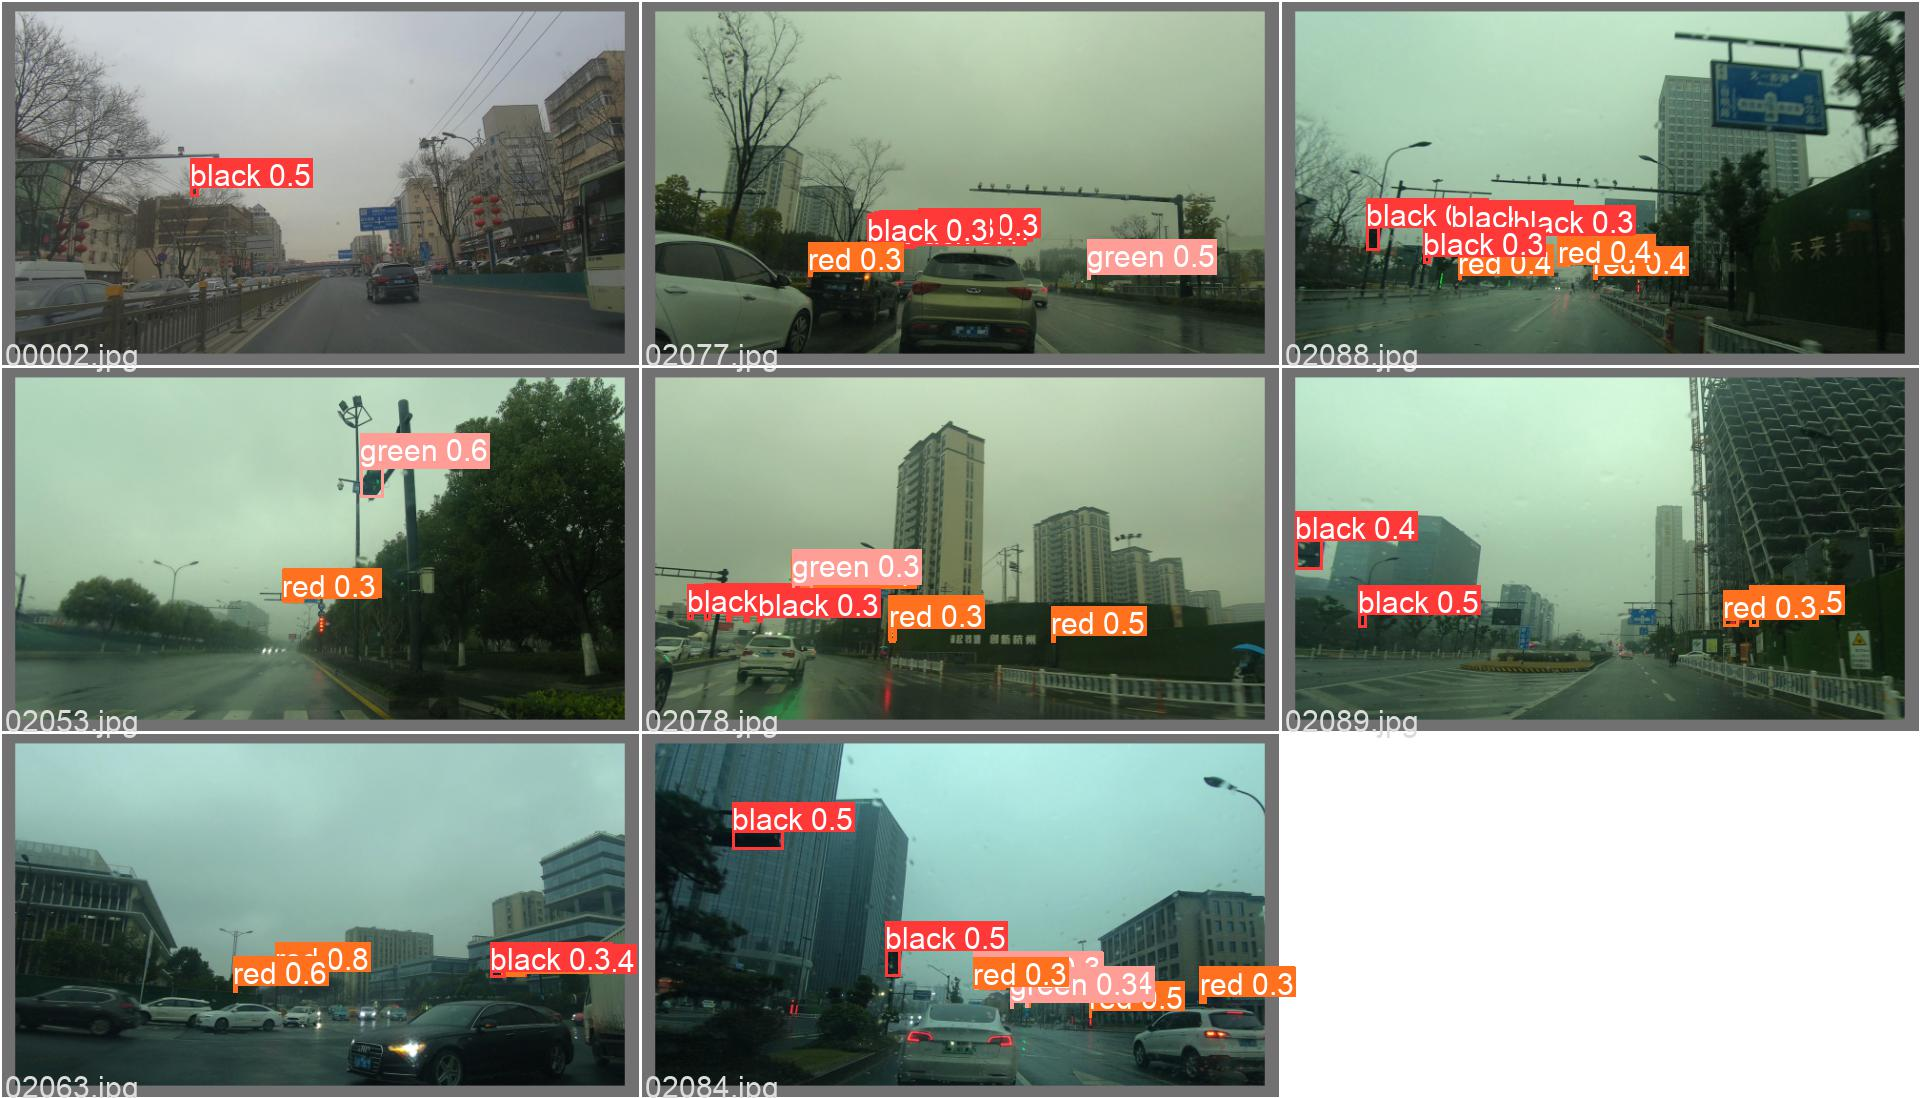

In [ ]:
# next, display model's predicted bounding boxes from the validation set
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5x_lights_multiclass12/val_batch0_pred.jpg', width=900)

#Test the trained YOLOv5 model with trained weights on a car dashcam clip from Youtube

In [ ]:
#import libraries
import cv2 # opencv2 package for python.
!pip install youtube-dl==2020.12.2
!pip install imutils pafy youtube-dl
import pafy # pafy allows us to read videos from youtube.
!pip install youtube-dl==2020.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 13.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Download dashcam video from Youtube and convert it to frames/images

URL = "https://youtu.be/eR5vsN1Lq4E?t=481" #URL to parse
play =  pafy.new(URL).streams[-1]
assert play is not None # we want to make sure their is a input to read.
stream = cv2.VideoCapture(play.url) #create a opencv video stream.

filename='/content/drive/MyDrive/yolov5/runs/detect/Youtube_video/'
N_frames=500
for i in range(N_frames):
  ret, frame = stream.read()
  cv2.imwrite(filename+str(i)+'.jpg', frame)

In [ ]:
#Get predicted bounding boxes for test set images using the best weights from the training set
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/yolov5x_trafficlight/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/yolov5/runs/detect/Youtube_video/  --save-txt --save-conf

In [19]:
5 % 2

1

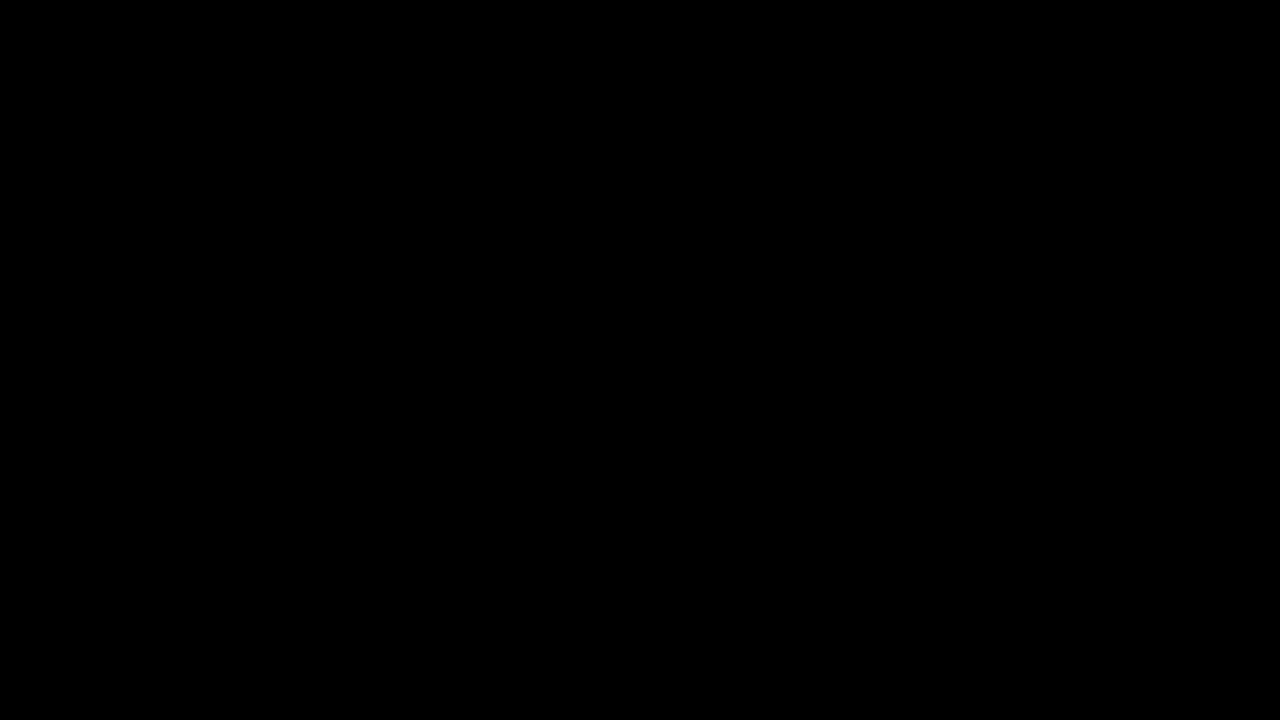

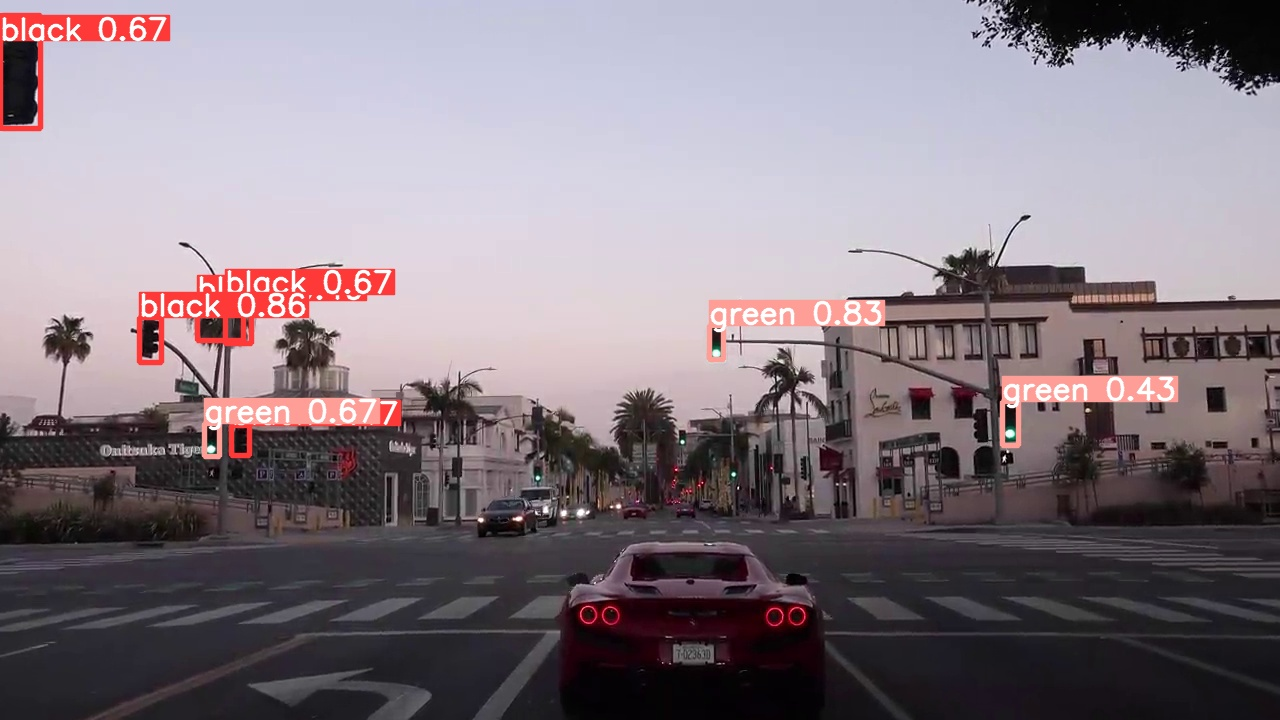

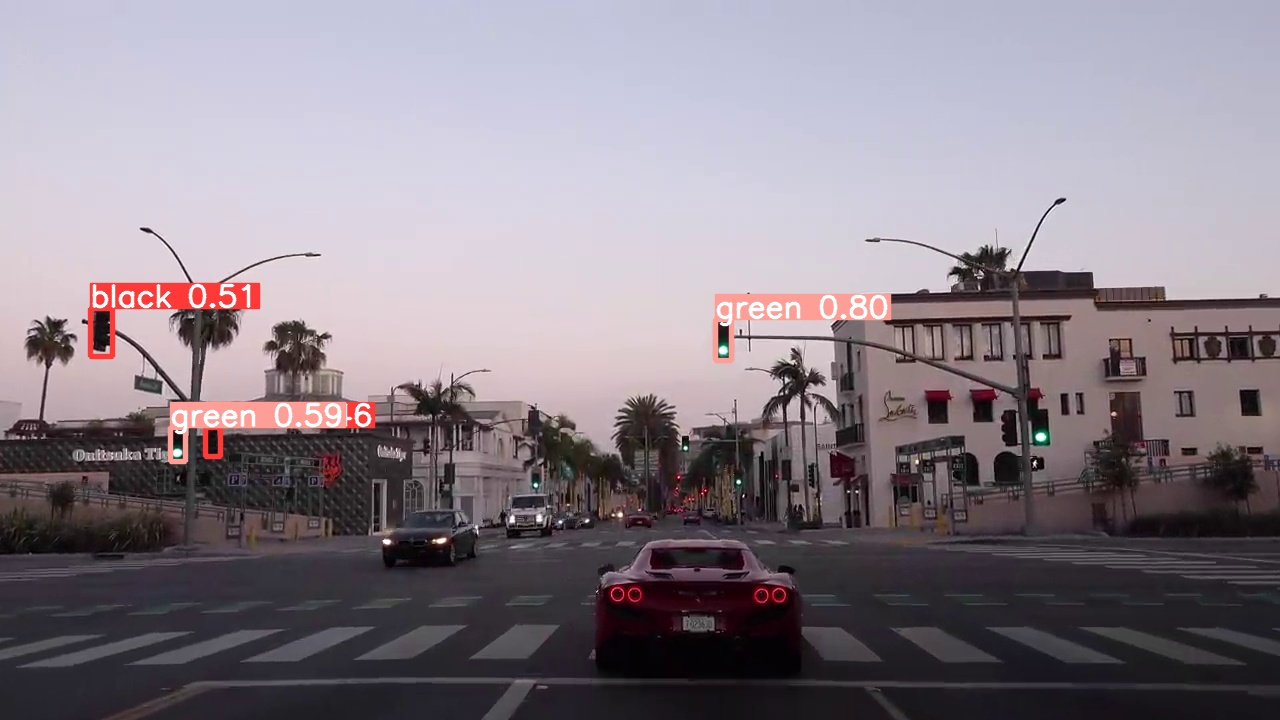

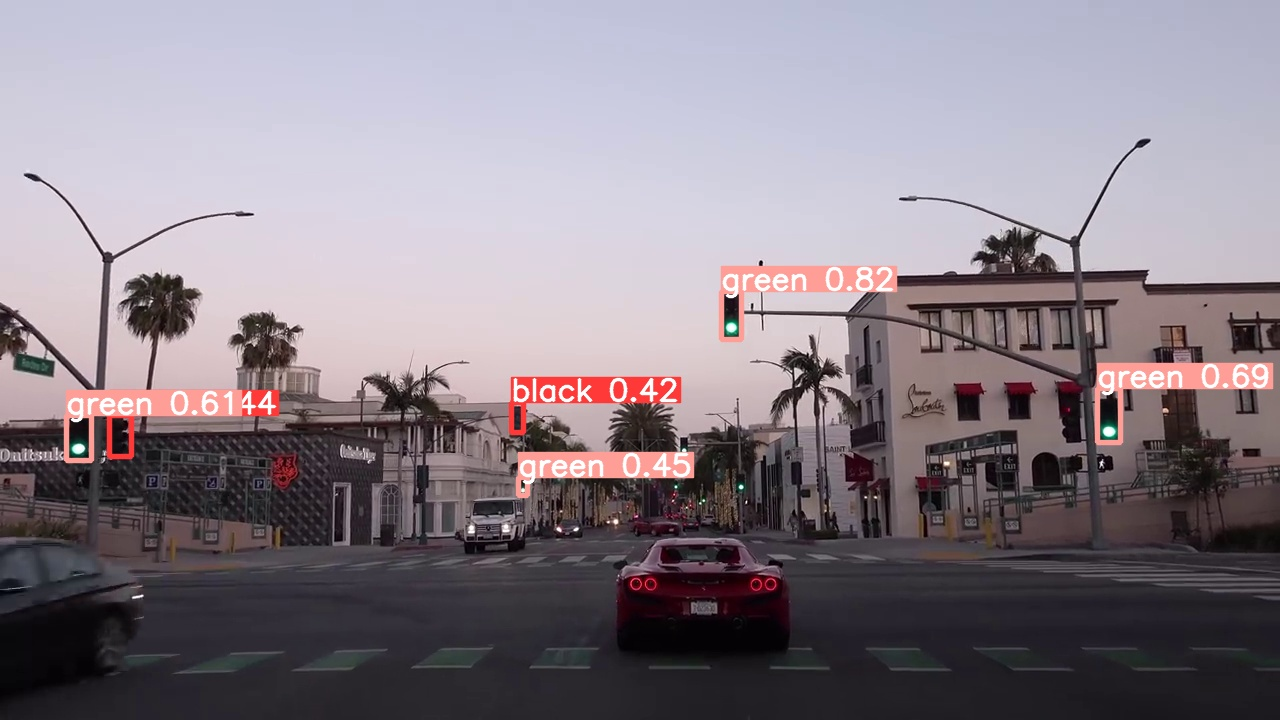

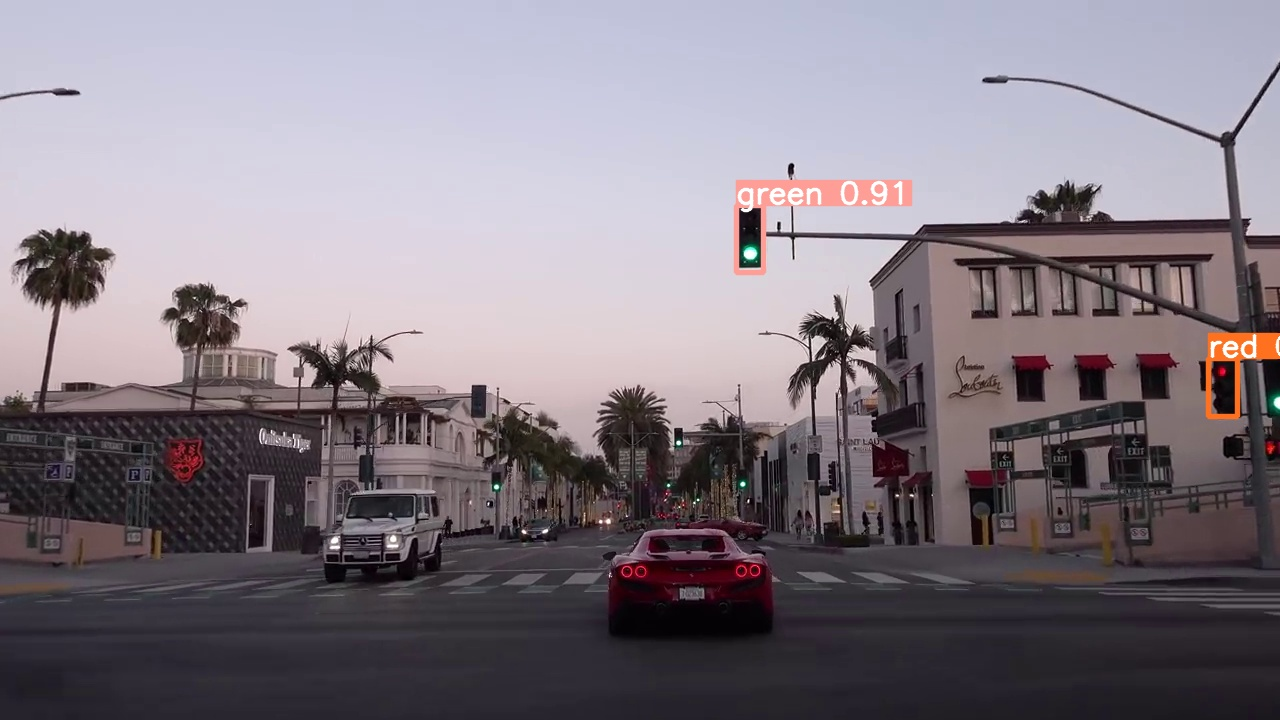

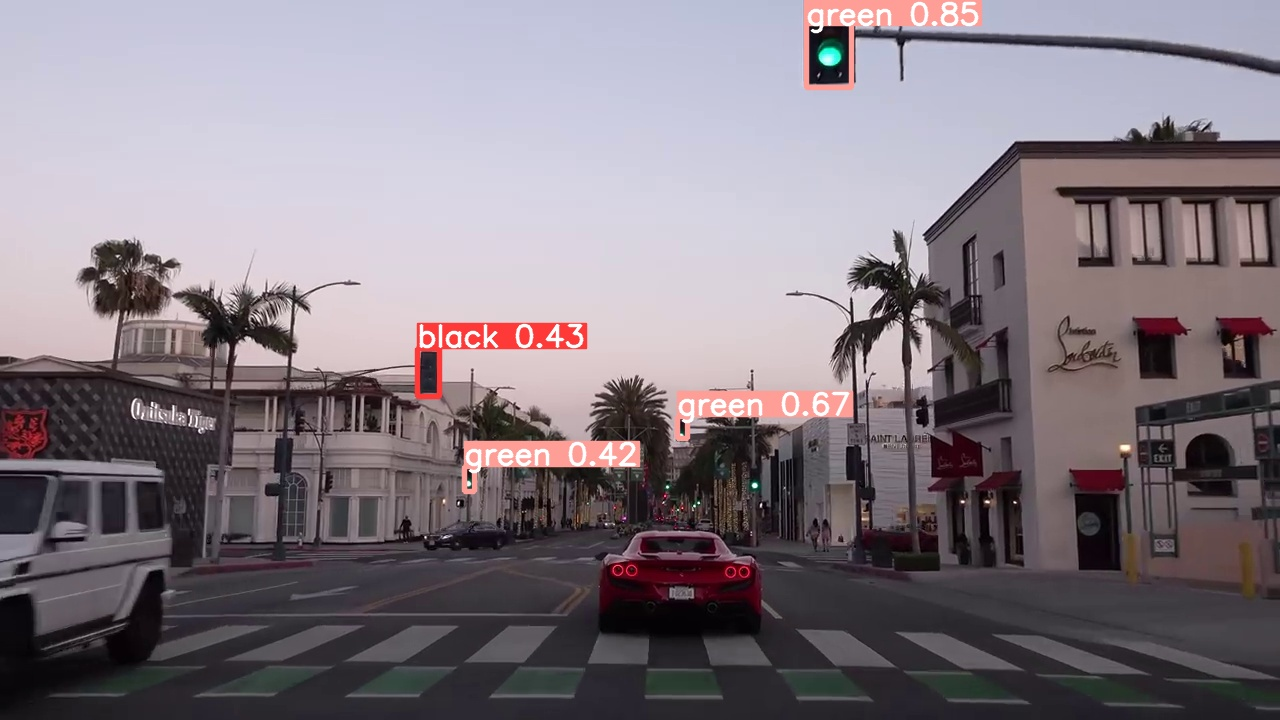

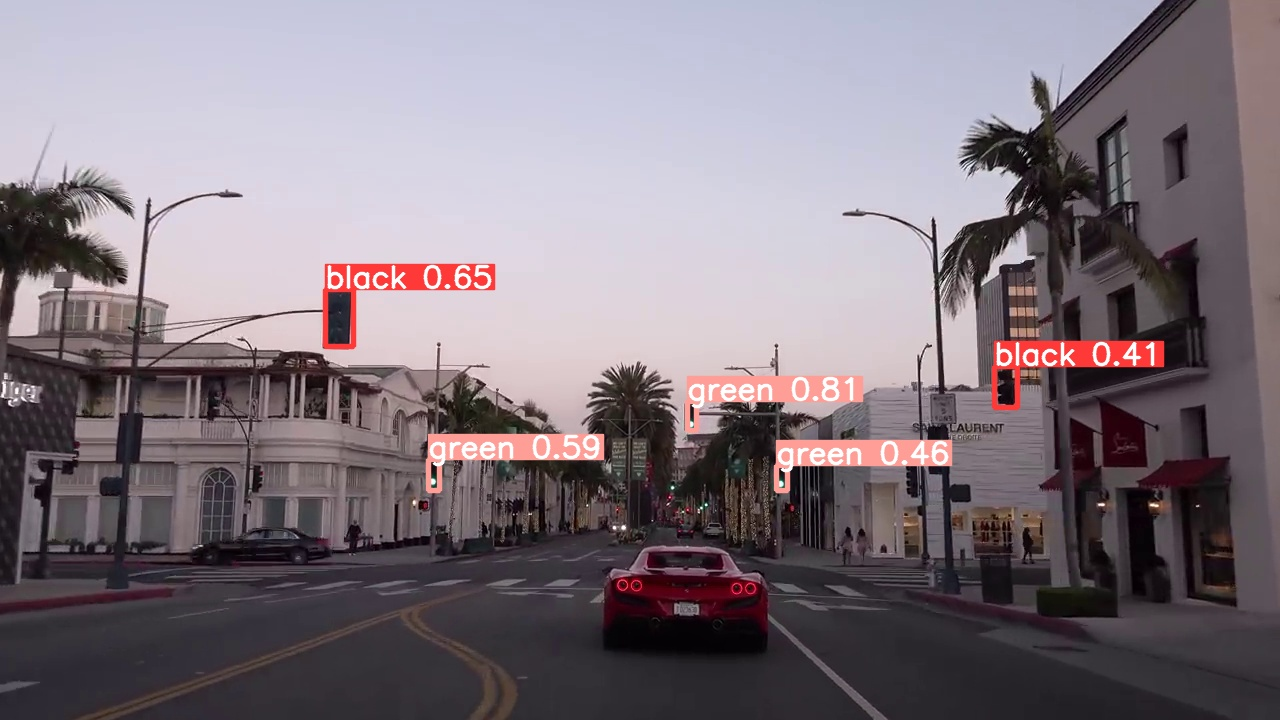

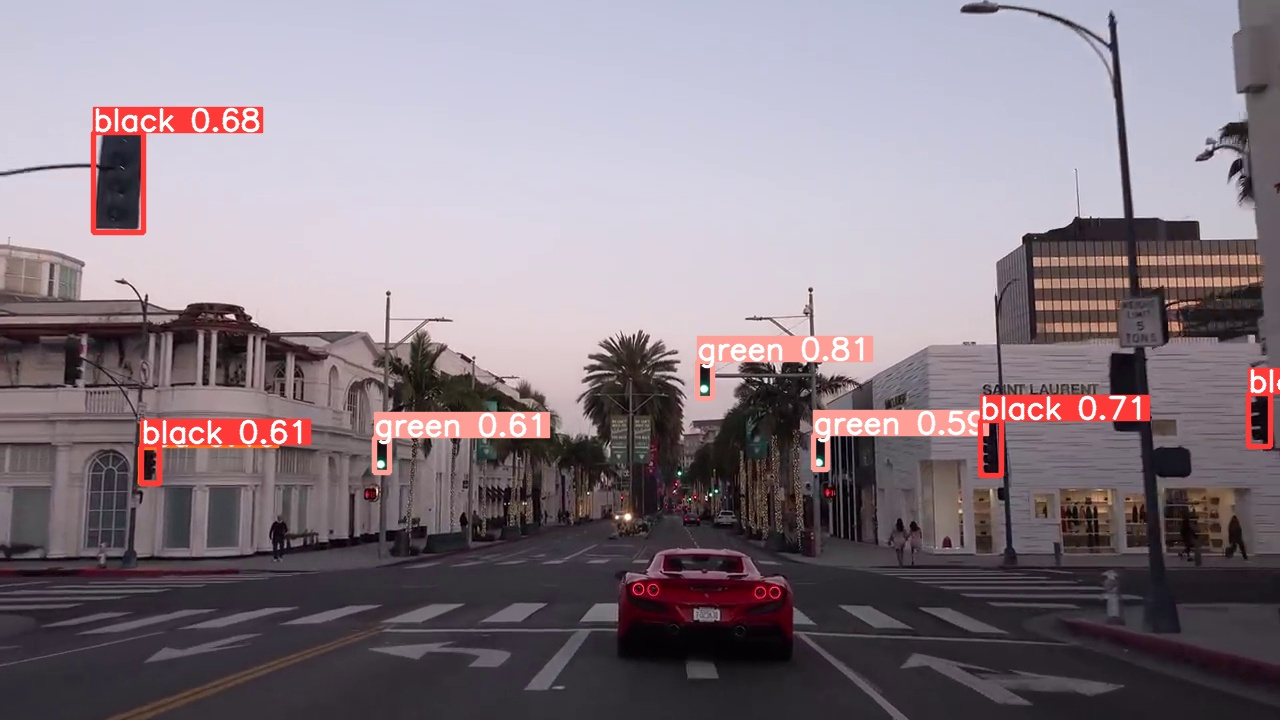

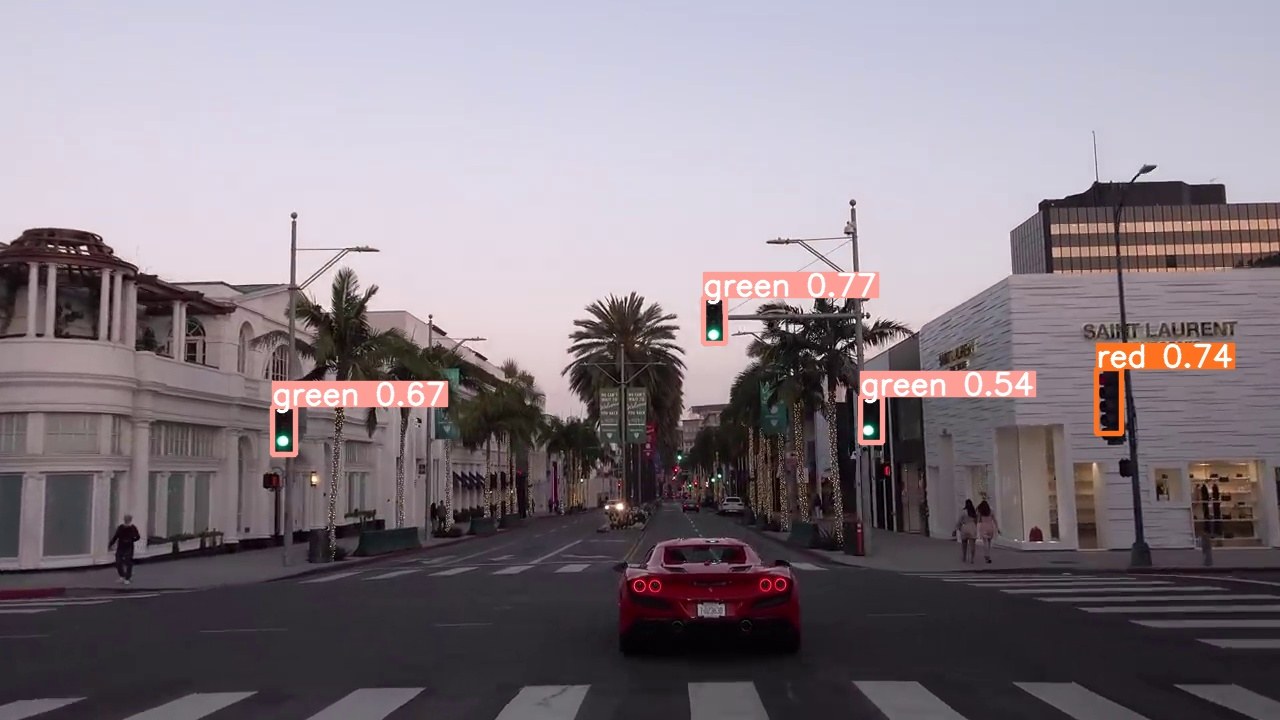

In [22]:
#display predicted bounding boxes on some frames from the test video

i = 100
for imageName in glob.glob('/content/drive/MyDrive/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    if i % 50 == 0:
      display(Image(filename=imageName))
      print("\n")
    if i == 500:
      break
    i+= 1